## ALGORITHMIC TRADING(PUNJAB NATIONAL BANK)

AUTHOR: SHUBHAM GONDRALWAR

DATE: 09/06/2020

# PNB STOCK OPEN PRICE PREDICTION

In [166]:
# WE WILL START BY IMPORTING ALL THE LIBRARIES REQUIRED FOR MODEL BUILDING.
import numpy as np # for numerical operation if any
import pandas as pd # mainly used for loading dataset and to handle dataframe operations
import matplotlib.pyplot as plt # for visulaisation
import seaborn as sns # for visulisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import math
import datetime
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [241]:
pnb = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/PNB/PNB.NS.csv")#pnb,us,nifty.
pnb.tail(10)
#escort.shape

,Date,Open,Adj Close
1074,27-05-2020,26.700001,27.500000
1075,28-05-2020,27.600000,26.750000
1076,29-05-2020,26.650000,26.750000
1077,01-06-2020,27.400000,29.200001
1078,02-06-2020,29.299999,29.250000
1079,03-06-2020,29.799999,30.250000
1080,04-06-2020,29.950001,31.000000
1081,05-06-2020,31.500000,33.750000
1082,08-06-2020,35.500000,32.599998
1083,09-06-2020,33.000000,31.799999


In [242]:
hongkong = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/hongkong.csv")#hangseng market index
hongkong.head()

,Date,hangopen
0,03-01-2011,23135.64063
1,04-01-2011,23477.31055
2,05-01-2011,23650.17969
3,06-01-2011,23861.22070
4,07-01-2011,23744.02930


In [243]:
austrilia = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/australia.csv")#austrilia markey index
austrilia.head()
#austrilia.shape

,Date,austopen
0,31-12-2010,4787.500000
1,04-01-2011,4758.299805
2,05-01-2011,4738.600098
3,06-01-2011,4717.700195
4,07-01-2011,4717.799805


In [244]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#japan index
nikkie.head()
#nikkie.shape

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [245]:
sanghai = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/sanghai.csv")#china market index
sanghai.head()
#sanghai.shape

,Date,sangaiopen
0,31-12-2010,2759.162109
1,04-01-2011,2825.329102
2,05-01-2011,2833.115967
3,06-01-2011,2838.435059
4,07-01-2011,2820.665039


In [246]:
nifty = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nifty50.csv")#niftyopen
nifty.head()
nifty.shape

(2316, 2)

In [247]:
df1 = pd.merge(pnb,hongkong,how = "inner",on = "Date")
df2 = pd.merge(df1,austrilia,how = "inner",on = "Date")
df3 = pd.merge(df2,nifty,how = "inner",on = "Date")
df4 = pd.merge(df3,nikkie,how = "inner",on = "Date")
df5 = pd.merge(df4,sanghai,how = "inner",on = "Date")

In [248]:
pnb_main = df5

In [249]:
pnb_main .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         936 non-null    object 
 1   Open         936 non-null    float64
 2   Adj Close    936 non-null    float64
 3   hangopen     933 non-null    float64
 4   austopen     935 non-null    float64
 5   niftyopen    935 non-null    float64
 6   nikkiesopen  921 non-null    float64
 7   sangaiopen   935 non-null    float64
dtypes: float64(7), object(1)
memory usage: 65.8+ KB


In [250]:
pnb_main

,Date,Open,Adj Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,12-01-2016,103.000000,99.650002,20030.02930,4932.200195,7587.200195,17470.92969,3026.158936
1,13-01-2016,100.800003,98.000000,20028.85938,4925.100098,7557.899902,17449.11914,3041.106934
2,14-01-2016,96.000000,97.800003,19578.91992,4987.399902,7467.399902,17384.92969,2874.049072
3,15-01-2016,98.800003,92.199997,19781.46094,4929.799805,7561.649902,17522.46094,2988.048096
4,18-01-2016,93.000000,90.849998,19287.38086,4869.200195,7420.350098,16826.92969,2847.539063
...,...,...,...,...,...,...,...,...
931,19-05-2020,27.600000,26.600000,24489.55078,5460.500000,8961.700195,20469.51953,2897.687012
932,20-05-2020,26.600000,26.600000,24462.90039,5559.500000,8889.150391,20454.49023,2896.466064
933,21-05-2020,26.600000,27.000000,24528.91016,5573.000000,9079.450195,20692.58984,2890.720947
934,22-05-2020,26.700001,26.650000,23756.91016,5550.399902,9067.900391,20583.94922,2863.045898


In [251]:
#pnb_main["Date"] = pd.to_datetime(pnb["Date"])#converted to datetime variable
#pnb_main["month"] = pnb_main ["Date"].dt.month
#pnb_main["day"] = pnb_main ["Date"].dt.day
#pnb_main ["year"] = pnb_main ["Date"].dt.year

In [252]:
pnb_main .head()

,Date,Open,Adj Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,12-01-2016,103.000000,99.650002,20030.02930,4932.200195,7587.200195,17470.92969,3026.158936
1,13-01-2016,100.800003,98.000000,20028.85938,4925.100098,7557.899902,17449.11914,3041.106934
2,14-01-2016,96.000000,97.800003,19578.91992,4987.399902,7467.399902,17384.92969,2874.049072
3,15-01-2016,98.800003,92.199997,19781.46094,4929.799805,7561.649902,17522.46094,2988.048096
4,18-01-2016,93.000000,90.849998,19287.38086,4869.200195,7420.350098,16826.92969,2847.539063


In [253]:
pnb_main .isnull().mean()

Date           0.000000
Open           0.000000
Adj Close      0.000000
hangopen       0.003205
austopen       0.001068
niftyopen      0.001068
nikkiesopen    0.016026
sangaiopen     0.001068
dtype: float64

In [254]:
pnb_main .isnull().sum()

Date            0
Open            0
Adj Close       0
hangopen        3
austopen        1
niftyopen       1
nikkiesopen    15
sangaiopen      1
dtype: int64

In [255]:
imputer = mdi.MeanMedianImputer(imputation_method='median')

In [256]:
imputer.fit(pnb_main)

MeanMedianImputer(imputation_method='median',
                  variables=['Open', 'Adj Close', 'hangopen', 'austopen',
                             'niftyopen', 'nikkiesopen', 'sangaiopen'])

In [257]:
imputer.imputer_dict_

{'Open': 88.4749985,
 'Adj Close': 88.6499975,
 'hangopen': 26532.88086,
 'austopen': 5855.899902,
 'niftyopen': 10329.25,
 'nikkiesopen': 20832.91016,
 'sangaiopen': 3014.040039}

In [258]:
pnb_main  = imputer.transform(pnb_main )
pnb_main.columns

Index(['Date', 'Open', 'Adj Close', 'hangopen', 'austopen', 'niftyopen',
       'nikkiesopen', 'sangaiopen'],
      dtype='object')

In [259]:
pnb_main .isnull().sum()

Date           0
Open           0
Adj Close      0
hangopen       0
austopen       0
niftyopen      0
nikkiesopen    0
sangaiopen     0
dtype: int64

In [260]:
pnb_main .describe().T

,count,mean,std,min,25%,50%,75%,max
Open,936.0,103.039690,40.752518,26.600000,72.875002,88.474998,139.587502,214.000000
Adj Close,936.0,102.811432,40.662152,26.600000,72.650002,88.649997,139.387501,213.600006
hangopen,936.0,26078.064752,3253.322789,18668.869140,23625.049320,26532.880860,28440.249997,33335.480470
austopen,936.0,5901.647967,509.484986,4546.000000,5560.325074,5855.899902,6217.099976,7144.600098
niftyopen,936.0,10034.563253,1360.963445,7029.850098,8819.875244,10329.250000,11029.887452,12430.500000
nikkiesopen,936.0,20384.775152,2288.654728,15094.709960,19089.130372,20832.910160,22244.050290,24103.449220
sangaiopen,936.0,3017.535349,226.048566,2446.019043,2869.336670,3014.040039,3192.122009,3563.639893


In [261]:
pnb_main.columns

Index(['Date', 'Open', 'Adj Close', 'hangopen', 'austopen', 'niftyopen',
       'nikkiesopen', 'sangaiopen'],
      dtype='object')

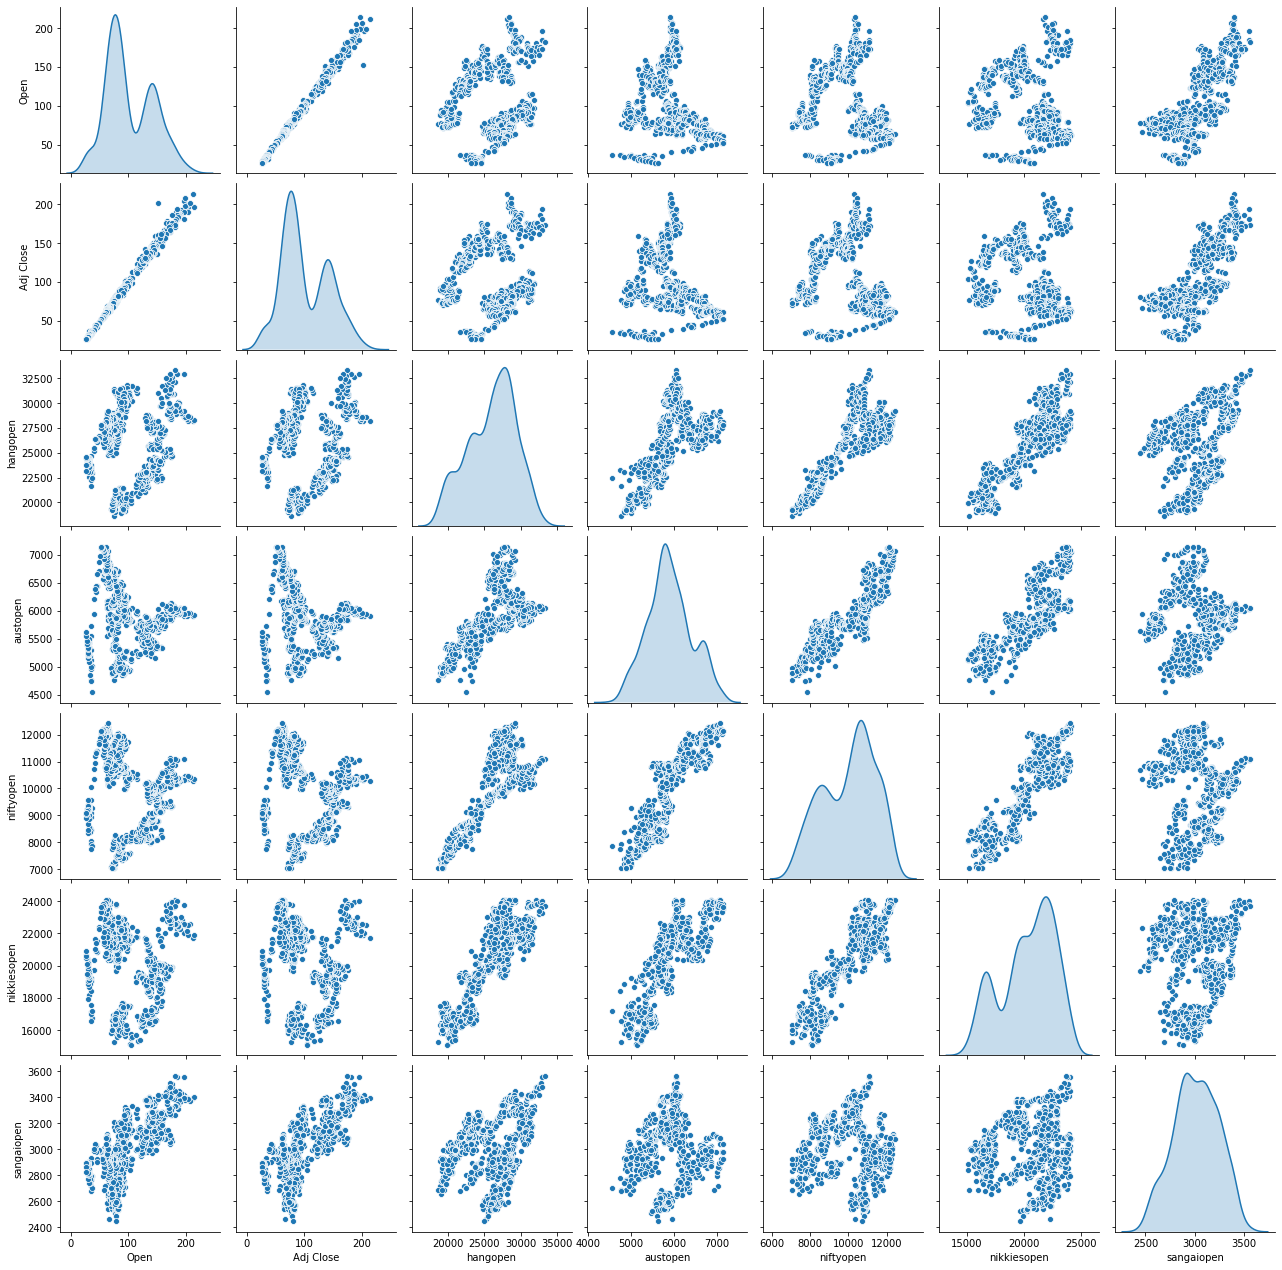

In [183]:
sns.pairplot(pnb_main,diag_kind='kde')

# FEATURE SELECTION USING R VALUE

In [140]:
correlation = pnb_main.corr()
correlation

,Open,Adj Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
Open,1.000000,0.996680,0.093183,-0.231027,-0.261181,-0.131832,0.746442
Adj Close,0.996680,1.000000,0.089772,-0.233455,-0.263925,-0.136092,0.745877
hangopen,0.093183,0.089772,1.000000,0.663710,0.802443,0.848493,0.304179
austopen,-0.231027,-0.233455,0.663710,1.000000,0.903268,0.804352,-0.004656
niftyopen,-0.261181,-0.263925,0.802443,0.903268,1.000000,0.877395,-0.096203
nikkiesopen,-0.131832,-0.136092,0.848493,0.804352,0.877395,1.000000,0.046614
sangaiopen,0.746442,0.745877,0.304179,-0.004656,-0.096203,0.046614,1.000000


In [141]:
cortarget = abs(correlation["Open"])
features = cortarget[cortarget>0.7]
features

Open          1.000000
Adj Close     0.996680
sangaiopen    0.746442
Name: Open, dtype: float64

In [142]:
Y = pnb_main['Open']

In [147]:
X= pnb_main.drop(['Open','hangopen','austopen','niftyopen','nikkiesopen'] , axis=1)

In [148]:
X

,Adj Close,sangaiopen
0,99.650002,3026.158936
1,98.000000,3041.106934
2,97.800003,2874.049072
3,92.199997,2988.048096
4,90.849998,2847.539063
...,...,...
931,26.600000,2897.687012
932,26.600000,2896.466064
933,27.000000,2890.720947
934,26.650000,2863.045898


In [149]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

# Tuning parameters to get best one

In [150]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)
print("bestparameters : ", grid.best_params_)


r2 / variance :  0.9934023872936816
bestparameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [151]:
model = LinearRegression(fit_intercept=True,normalize=False)

In [152]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
X_test.head()

,Adj Close,sangaiopen
382,138.199997,3376.599121
513,80.550003,3205.437012
121,123.500000,2978.778076
769,66.900002,2946.260010
898,35.299999,2796.283936


In [155]:
y_pred = model.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("the mean absolute error is:",mean_absolute_error(y_test,y_pred))
mse_linear = mean_squared_error(y_pred,y_test)
print("the meansquared error is:",mse_linear)

the mean absolute error is: 1.7827106269151323
the meansquared error is: 7.154545486835686


In [157]:
 prediction = model.predict(X_train)

In [158]:
yhat = grid.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.9933061755533326 0.9932910653401347


In [159]:
y_pred = model.predict(X_test)

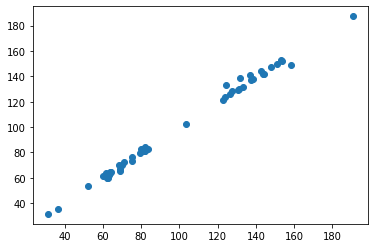

In [160]:
plt.scatter(y_test, y_pred)

In [161]:
X_test["predictedstock"] = y_pred

In [162]:
X_test["actualstock"] = y_test

In [163]:
X_test.tail(20)

,Adj Close,sangaiopen,predictedstock,actualstock
373,137.000000,3373.344971,137.410382,137.500000
350,143.800003,3361.461914,144.157455,142.600006
913,31.100000,2826.662109,31.530391,31.549999
806,61.950001,2927.919922,62.310816,63.250000
847,60.799999,2926.342041,61.165822,59.950001
832,63.250000,2902.550049,63.575308,64.000000
791,59.400002,2925.939941,59.773591,62.000000
319,152.899994,3219.791016,153.048378,153.350006
658,84.250000,2569.070068,84.085647,82.000000
882,52.700001,2979.521973,53.171766,52.500000


# test data for June Data

In [195]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/PNB/live for pnb.csv")

In [196]:
tar = test["Open"]

In [197]:
test = test.drop(["Date","Open"],axis = 1)

In [198]:
pred = model.predict(test)


In [201]:
test["actualpnb"] = tar

In [202]:
test["predictedpnb"] = pred

In [203]:
test

,Adj Close,sanagiopen,predictedpnb,actualpnb
0,29.200001,2871.96,29.691320,27.400000
1,29.250000,2916.32,29.789784,29.299999
2,30.250000,2930.39,30.799385,29.799999
3,31.000000,2931.84,31.546582,29.950001
4,33.750000,2923.19,34.270951,31.500000
5,32.599998,2941.98,33.148344,35.500000
6,31.799999,2929.53,32.339352,33.000000


In [222]:
mean_squared_error(test["actualpnb"],test["predictedpnb"])

3.2403987831094625

# The mean squared error is 3.2

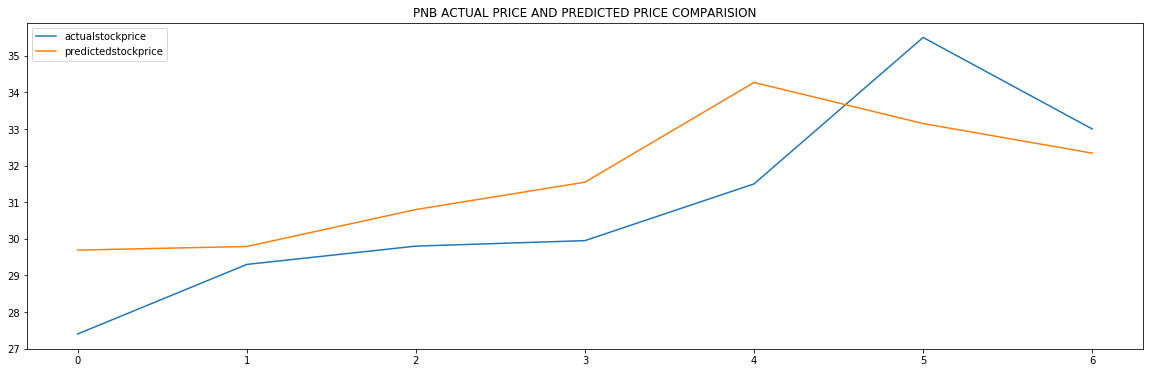

In [204]:
plt.figure(figsize = (20,6))
plt.plot(test["actualpnb"])
plt.plot(test["predictedpnb"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("PNB ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# Model building using ridge and lasso regression

In [205]:
from sklearn.linear_model import Lasso,Ridge

In [206]:
X_test

,Adj Close,sangaiopen,predictedstock,actualstock
382,138.199997,3376.599121,138.606920,131.500000
513,80.550003,3205.437012,81.106795,81.400002
121,123.500000,2978.778076,123.555850,123.900002
769,66.900002,2946.260010,67.251953,69.199997
898,35.299999,2796.283936,35.672376,36.500000
175,148.800003,3208.497070,148.960012,158.500000
77,76.599998,2817.968018,76.754068,75.300003
785,63.599998,2885.149902,63.904129,61.500000
34,82.699997,2839.410889,82.841872,80.000000
600,64.300003,2643.073975,64.333956,64.000000


# Tuning Hyperparamters

In [207]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000000)
parameters={'alpha':[0.000001,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,56,42,35,550],'normalize':[True,False]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=20)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'normalize': [True, False],
                         'random_state': [1, 56, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [209]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1, 'normalize': False, 'random_state': 1}
0.9933685777407885


In [210]:
lasso=Lasso(max_iter=100000000,alpha= 5, normalize=False, random_state= 1)
lasso.fit(X_train,y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
x_test_lasso = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [212]:
predlasso = lasso.predict(x_test_lasso)

In [213]:
mean_squared_error(predlasso,y_test)

7.132305095378119

In [215]:
test.columns

Index(['Adj Close', 'sanagiopen', 'predictedpnb', 'actualpnb'], dtype='object')

In [216]:
test_lasso = test.drop(['predictedpnb', 'actualpnb'],axis = 1)

In [217]:
predlive_lasso = lasso.predict(test_lasso)

In [218]:
test["predictedlasso"] = predlive_lasso

In [219]:
test

,Adj Close,sanagiopen,predictedpnb,actualpnb,predictedlasso
0,29.200001,2871.96,29.691320,27.400000,30.017261
1,29.250000,2916.32,29.789784,29.299999,30.145551
2,30.250000,2930.39,30.799385,29.799999,31.158943
3,31.000000,2931.84,31.546582,29.950001,31.902802
4,33.750000,2923.19,34.270951,31.500000,34.605455
5,32.599998,2941.98,33.148344,35.500000,33.502230
6,31.799999,2929.53,32.339352,33.000000,32.689395


In [221]:
mean_squared_error(test["predictedlasso"],test["actualpnb"])

3.8509406652461697

# The mean square error using lasso is 3.85

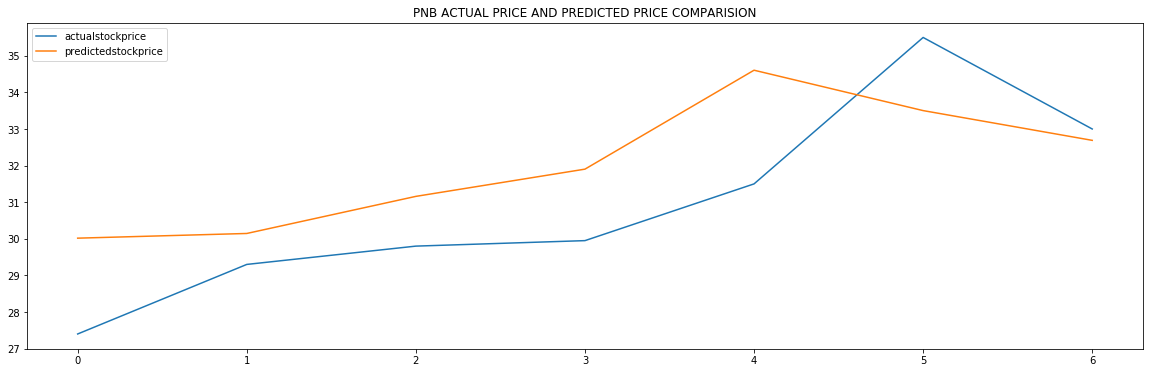

In [220]:
plt.figure(figsize = (20,6))
plt.plot(test["actualpnb"])
plt.plot(test["predictedlasso"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("PNB ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# ENSEMBLE TECHNIQUE

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

In [263]:
pnb_main.columns

Index(['Date', 'Open', 'Adj Close', 'hangopen', 'austopen', 'niftyopen',
       'nikkiesopen', 'sangaiopen'],
      dtype='object')

In [264]:
pnb_main = pnb_main.drop(['Date', 'hangopen', 'austopen', 'niftyopen',
       'nikkiesopen'],axis=1)

In [265]:
Y =pnb_main["Open"]

In [266]:
X = pnb_main.drop(["Open"],axis = 1)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

In [268]:
kfold = model_selection.KFold(n_splits=10,random_state= 50)

In [269]:
estimator = []
model1 = LinearRegression(normalize=False,fit_intercept=False,n_jobs=-1)
estimator.append(('Linear',model1))
model2 = Ridge(alpha=0.0000001,
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    max_iter=100000,
    tol=0.000001,
    solver='cholesky',
    random_state=35)
estimator.append(('ridge',model2))
model3 = DecisionTreeRegressor(max_depth=15)
estimator.append(('desiciontree',model3))

In [270]:
#creating ensemble model
ensemble = VotingRegressor(estimator)
result = model_selection.cross_val_score(ensemble,X_train,y_train,cv =kfold)

In [271]:
result.mean()

0.9930194564048469

In [272]:
ensemble=ensemble.fit(X_train,y_train)

In [274]:
predic_value=ensemble.predict(X_test)
predic_value

array([139.09091599,  80.95660466, 125.24192376,  66.9858002 ,
        35.77745734, 148.66794209,  75.50494971,  63.9359968 ,
        83.06363955,  64.78243651,  69.4653664 , 130.22608281,
        60.82536878, 147.59059589,  72.14894486,  69.38389477,
        73.3079696 , 142.7722177 ,  64.82905757,  80.63000143,
       152.3797386 , 129.54642018, 122.77401162,  79.1534822 ,
       132.04760588, 151.9182301 , 142.46965595, 137.28664264,
       143.87939797,  31.26856509,  61.82521153,  60.8610808 ,
        63.06094248,  59.79814472, 151.6945974 ,  84.20695918,
        52.7059494 , 133.48702592,  85.32487008, 187.22509131,
        83.638269  , 138.28993966, 140.8672156 ,  65.23831324,
       130.55792223, 126.30039931, 100.29296096])

In [276]:
(mean_squared_error(predic_value,y_test))

7.408476117412235

In [278]:
test.columns

Index(['Adj Close', 'sanagiopen', 'predictedpnb', 'actualpnb',
       'predictedlasso'],
      dtype='object')

In [279]:
test_ensemble = test.drop(['predictedpnb', 'actualpnb',
       'predictedlasso'],axis=1)

In [280]:
pred_live_ensemble = ensemble.predict(test_ensemble)

In [284]:
(mean_squared_error(pred_live_ensemble,test['actualpnb']))

3.2823678452383453

In [285]:
test["predicted_ensemble"] = pred_live_ensemble

In [286]:
test

,Adj Close,sanagiopen,predictedpnb,actualpnb,predictedlasso,predicted_ensemble
0,29.200001,2871.96,29.691320,27.400000,30.017261,29.476202
1,29.250000,2916.32,29.789784,29.299999,30.145551,29.611349
2,30.250000,2930.39,30.799385,29.799999,31.158943,30.281139
3,31.000000,2931.84,31.546582,29.950001,31.902802,30.779660
4,33.750000,2923.19,34.270951,31.500000,34.605455,34.585042
5,32.599998,2941.98,33.148344,35.500000,33.502230,32.746128
6,31.799999,2929.53,32.339352,33.000000,32.689395,32.259797


In [ ]:
plt.figure(figsize = (20,6))
plt.plot(test["actualpnb"])
plt.plot(test["predicted_ensemble"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("PNB ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# ADABOOST REGRESSOR

In [287]:
from sklearn.ensemble import AdaBoostRegressor
param = {"n_estimators":[10,20,30,40,50, 60,36],"learning_rate":[0.00000002,1e-10,1e-8,1e-3,1e-2],"loss":['linear','square','exponential']}
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True))
gridada = GridSearchCV(adamodel,param,cv=5)
gridada.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=True),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [2e-08, 1e-10, 1e-08, 0.001, 0.01],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 36]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [288]:
print(gridada.best_params_)
print(gridada.best_score_)

{'learning_rate': 1e-10, 'loss': 'square', 'n_estimators': 20}
0.99326778301815


In [289]:
adamodel =AdaBoostRegressor(base_estimator=Ridge(),learning_rate=2e-08, loss= 'linear', n_estimators= 10)

In [290]:
adamodel.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=2e-08, loss='linear', n_estimators=10,
                  random_state=None)

In [291]:
predada = adamodel.predict(X_test)

In [ ]:
mean_squared_error(predada,y_test)

In [292]:
test.columns

Index(['Adj Close', 'sanagiopen', 'predictedpnb', 'actualpnb',
       'predictedlasso', 'predicted_ensemble'],
      dtype='object')

In [293]:
test_ada = test.drop(['predictedpnb', 'actualpnb',
       'predictedlasso', 'predicted_ensemble'],axis = 1)


In [294]:
predada = adamodel.predict(test_ada)

In [295]:
test["adaboost_pred"] = predada

In [296]:
test

,Adj Close,sanagiopen,predictedpnb,actualpnb,predictedlasso,predicted_ensemble,adaboost_pred
0,29.200001,2871.96,29.691320,27.400000,30.017261,29.476202,29.559359
1,29.250000,2916.32,29.789784,29.299999,30.145551,29.611349,29.679218
2,30.250000,2930.39,30.799385,29.799999,31.158943,30.281139,30.690118
3,31.000000,2931.84,31.546582,29.950001,31.902802,30.779660,31.437433
4,33.750000,2923.19,34.270951,31.500000,34.605455,34.585042,34.160925
5,32.599998,2941.98,33.148344,35.500000,33.502230,32.746128,33.040110
6,31.799999,2929.53,32.339352,33.000000,32.689395,32.259797,32.229967


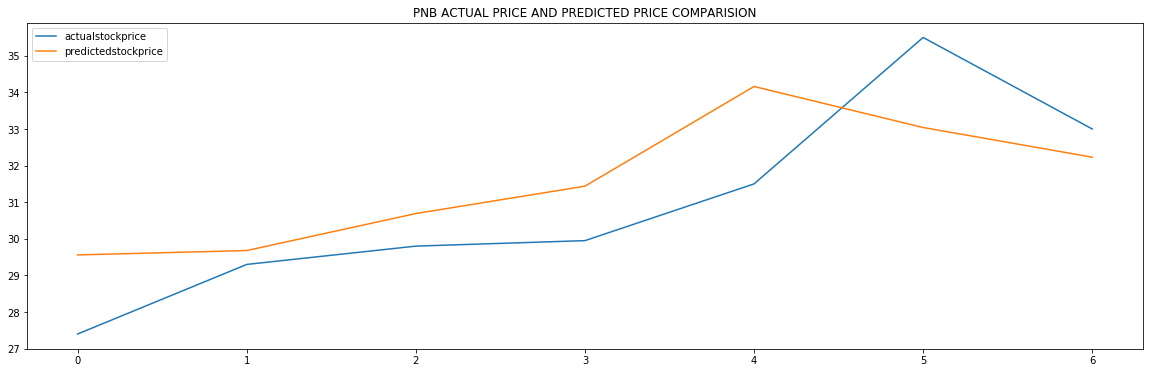

In [297]:
plt.figure(figsize = (20,6))
plt.plot(test["actualpnb"])
plt.plot(test["adaboost_pred"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("PNB ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# JUNE DATA

In [303]:
test

,Adj Close,sanagiopen,actualpnb,predicted_ensemble
0,29.200001,2871.96,27.400000,29.476202
1,29.250000,2916.32,29.299999,29.611349
2,30.250000,2930.39,29.799999,30.281139
3,31.000000,2931.84,29.950001,30.779660
4,33.750000,2923.19,31.500000,34.585042
5,32.599998,2941.98,35.500000,32.746128
6,31.799999,2929.53,33.000000,32.259797


In [300]:
mean_squared_error(test["actualpnb"],test["predicted_ensemble"])

3.2823678452383453

In [ ]:
import pickle
pickle.dump(ensemble,open('pnb.pickle','wb'))
pnb_picklemodel = pickle.load(open('pnb.pickle','rb'))

# CONCLUSION:


# Almost all the models are able to explain the total variance in the data.


# For prediction purpose Ensemble model is choosen whose mean square error for live (june) data is 3.28.

# =========================code ends here===================##